In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL as pl

import denoise as dn

## explicações

Toda imagem funciona como uma matriz.
<br>
As em cinza são as matrizes mais simples. Elas são apenas dois vetores com x pixels por y pixels.
<br>
Ex:

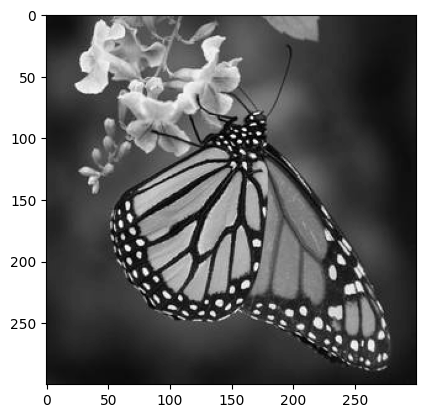

In [13]:
img = cv2.imread('test3.jpg')
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #cinzando a imagem que antes era RGB

plt.imshow(img_,cmap='gray')

In [14]:
print(img_) #mostrando sua matriz

[[17 17 16 ... 22 22 22]
 [17 17 16 ... 22 22 22]
 [17 17 16 ... 22 22 22]
 ...
 [33 31 30 ... 16 16 16]
 [34 33 31 ... 16 16 16]
 [36 35 33 ... 16 16 16]]


In [15]:
img_.shape # veja, são dois vetores com cada um com o seu número de pixels

(300, 300)

para que ele possa ser averiguado em um filtro de mediana com matrix 3x3, todos esses Y * X pixels existentes
devem ser organizados em uma matriz com (Y * X)/(3 * 3) vetores de pixels, com cada um contendo 3x3 pixels organizados em uma matriz 3x3. <br>
Ex:

In [19]:
x,y = img_.shape

d = 3 # n da dimensão de matriz que queremos

nova_img = img_.reshape(int(x*y//dn),d,d)

nova_img

array([[[17, 17, 16],
        [16, 15, 15],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 17, 17]],

       [[18, 20, 21],
        [23, 24, 24],
        [25, 28, 30]],

       ...,

       [[18, 18, 18],
        [18, 17, 16],
        [15, 17, 17]],

       [[17, 17, 17],
        [17, 17, 17],
        [18, 16, 15]],

       [[16, 18, 18],
        [17, 15, 16],
        [16, 16, 16]]], dtype=uint8)

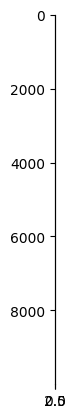

In [21]:
plt.imshow(nova_img) # veja que neste formato ela não pode ser interpretada

In [23]:
# vimos acima, que no seu novo tamanho, ela já uma matriz com N pixels 3x3,
# pronta para ser filtrada, mas vamos ter ctz disso nisso aqui

nova_img.shape

(10000, 3, 3)

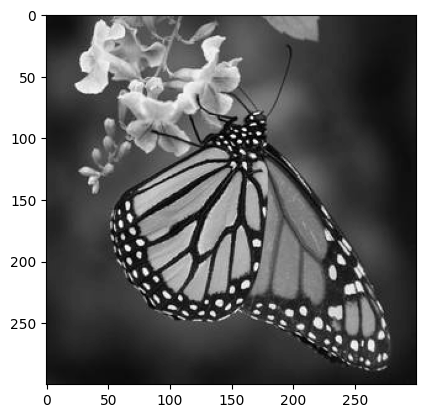

In [25]:
#podemos trazer-la de volta ao formato original assim

shape_or = img_.shape # tamanho da imagem original (cinza)

res_img = nova_img.reshape(shape_or)


plt.imshow(res_img,cmap='gray')

In [26]:
#seria inviável trabalhar com a original, pois ela sim possui um escalonamento de matriz diferente por ser RGB
img.shape # imagem original

(300, 300, 3)

In [27]:
img

array([[[17, 17, 17],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       [[17, 17, 17],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       [[17, 17, 17],
        [17, 17, 17],
        [16, 16, 16],
        ...,
        [22, 22, 22],
        [22, 22, 22],
        [22, 22, 22]],

       ...,

       [[33, 33, 33],
        [31, 31, 31],
        [30, 30, 30],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[34, 34, 34],
        [33, 33, 33],
        [31, 31, 31],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]],

       [[36, 36, 36],
        [35, 35, 35],
        [33, 33, 33],
        ...,
        [16, 16, 16],
        [16, 16, 16],
        [16, 16, 16]]], dtype=uint8)

só em projetos avançados para brincar-mos isso acima
<br>

<hr>

 vamos criar uma função para adicionar ruído a imagem original (cinza)

In [30]:




#criando função para o ruido impulsivo (sal e pimenta)
def adicionar_ruido(img_or_, modo='s&p',grau=.4):
    img_n =np.zeros(img_or_.shape) #criando uma nova img a partir da original
    linhas , colunas = img_n.shape #pegando o numero de linhas e colunas da imagem
    n_pixels = linhas*colunas
    if 's' in modo:
      pixels = np.random.randint(300, int(10000)) # número de pixels com sal
      for i in range(pixels):
          y_coord=np.random.randint(0, linhas - 1) #escolhendo de maneira aleatoria onde o ruido de sal vai cair nas linhas da imagem
          x_coord=np.random.randint(0, colunas - 1) #escolhendo de maneira aleatoria onde o ruido de sal vai cair nas colunas da imagem
          img_n[y_coord][x_coord] = np.random.randint(90,255) #adicinando o sal, com pixelagem de 90 a 255, sendo escolhido no aleatório
          
    if 'p' in modo:
      pixels = np.random.randint(300,int(10000)) # número de pixels com pimenta
      for i in range(pixels):
          y_coord=np.random.randint(0, linhas - 1) #escolhendo de maneira aleatoria onde o ruido de pimenta vai cair nas linhas da imagem
          x_coord=np.random.randint(0, colunas - 1) ##escolhendo de maneira aleatoria onde o ruido de pimenta vai cair nas colunas da imagem
          img_n[y_coord][x_coord] = np.random.randint(0,10) #adicinando a pimenta, com pixelagem de 0 a 10, sendo escolhido no aleatório
           
    return cv2.add(img_or_,img_n.astype(np.uint8)) #retornando a matrix da imagem já ruidosa como uint8 para não dá erro na sua acoplagem ou subtração com a original


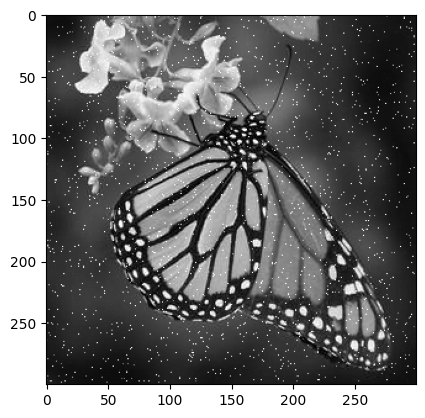

In [31]:
img_ruido = adicionar_ruido(img_)

plt.imshow(img_ruido,cmap='gray')